### "jupyter much gravity, will try to bring some levity" 

#### What is kernel in jupyter notebook? 
- In Jupyter Notebook, a kernel is a separate computational process that runs the code you write in the notebook cells. Kernels are designed to execute code, manage the program's state, and communicate with the notebook interface. Each notebook can be associated with a specific kernel, chosen based on the programming language you want to use (e.g., Python, R, Julia).  
- A notebook kernel has no similarity at all to an operating system kernel. It's just a similar name for two completely different things. 



### Important libraries and modules

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model, datasets,tree 
import matplotlib.pyplot as plt  
# display plots inline 
%matplotlib inline 

### Linear Regression

#### Data Preparation  
- First we will prepare some data for demonstrating linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data:
$$y = \frac{x}{2}+sin(x)+\epsilon$$
Where $\epsilon \sim \mathcal{N}(0,1)$ is Gaussian noise. 


- adding Gaussian noise to synthetic data for linear regression is a common practice to make the data more realistic, test the model's robustness, evaluate its generalization ability, and align with the assumptions of linear regression. It helps in creating a more practical and reliable model for real-world applications.

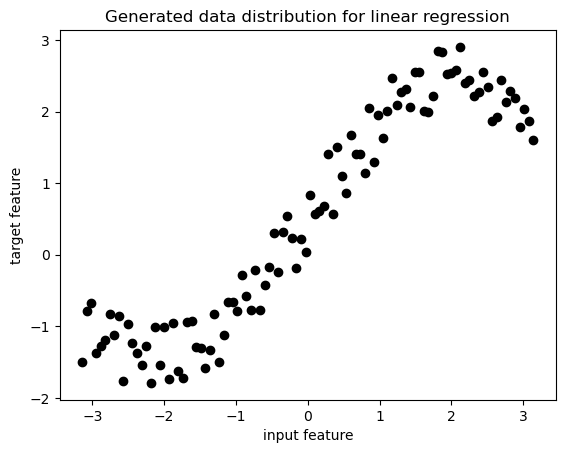

In [16]:
number_sample=100  
x = np.linspace(-np.pi,np.pi,number_sample)
#  It generates an array x containing 100 equally spaced values ranging from -π to π.

y = 0.5*x + np.sin(x) + np.random.random(x.shape) # x.shape is passed to have random number having same shape 
plt.scatter(x,y,color='black') 
plt.xlabel("input feature") 
plt.ylabel("target feature") 
plt.title("Generated data distribution for linear regression")
plt.show()

### Split the dataset into training, validation and test sets
---------------------------------------------------
It is always encouraged in machine learning to split the available data into _training_, _validation_ and _test_ sets. The training set is supposed to be used to train the model. The model is evaluated on the validation set after every episode of training. The performance on the validation set gives a measure of how good the model _generalizes_. Various hyperparameters of the model are tuned to improve performance on the validation set. Finally when the model is completely optimized and ready for deployment, it is evaluated on the _test data_ and the performance is reported in the final description of the model. 

In this example we do a $70\%-15\%-15\%$ random split of the data between the training, validation and test sets respectively.

In [17]:
random_indices = np.random.permutation(number_sample) 
# Training data 
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]] 

# Validation data 
x_val = x[random_indices[70:85]] 
y_val = y[random_indices[70:85]] 

# Testing data 
x_test = x[random_indices[85:]] 
y_test = y[random_indices[85:]] 


### Fit a line to the data
----------------------
Linear regression learns to fit a hyperplane to our data in the feature space. For one dimensional data, the hyperplane reduces to a straight line. We will fit a line to our data using [__sklearn.linear_model.LinearRegression__](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

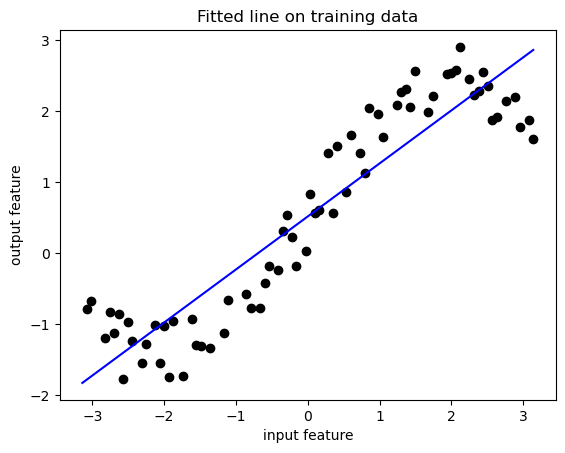

In [18]:
model = linear_model.LinearRegression() # linear reg object which follows least squared error  

#since sklearn takes the inputs as matrices, we have to reshape the input feature into column matrix 
x_train_final = np.asarray(x_train.reshape(len(x_train),1)) 
y_train_final = np.asarray(y_train.reshape(len(y_train),1))  

#fit the line to training data 
model.fit(x_train_final,y_train_final) 

#plot the line 
plt.scatter(x_train,y_train, color='black') 
plt.plot(x.reshape(len(x),1),model.predict(x.reshape(len(x),1)),color='blue') 
plt.xlabel("input feature") 
plt.ylabel("output feature") 
plt.title("Fitted line on training data") 
plt.show()




Evaluate the model
------------------
Now that we have our model ready, we must evaluate our model. In a linear regression scenario, its common to evaluate the model in terms of the _mean squared error_ on the validation and test sets.

In [19]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print ('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  3.768672563965736 
Test MSE:  4.8935257564153956


### Logistic regression 
Logistic Regression is a statistical and machine learning model used for binary classification tasks, where the goal is to predict one of two possible outcomes based on input features. Despite its name, logistic regression is primarily used for classification, not regression. Logistic regression works by first looking for linear decision boundaries between the samples of different classes. Then the logistic function $\sigma(\cdot)$ is used to get the probability of belongingness to each class defined with respect to the decision boundaries. The logistic function is defined as follows:
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
The output probability of belongingness to a class that can be suitably thresholded to get hard classification.

In this tutorial we will demonstrate this with the example of classifying a part of the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris).  

Prepare data
------------
The data has 4 input-features and 3 output-classes. For simplicity we will use only two features: _sepal-length_ and _sepal-width_ (both in cm) and two output classes: _Iris Setosa_ and _Iris Versicolour_. 

In [20]:
iris = datasets.load_iris() 
X = iris.data[:,:2] # take first 2 input feature 
Y = iris.target 
#taking first 100 samples, first 50 class 0 and next 50 belongs to class 1 
X = X[:100] 
Y = Y[:100] 
num_samples = len(X) 

#splitting the data into train,val,test 
random_indices = np.random.permutation(num_samples) 
x_train = X[random_indices[:70]]
y_train = Y[random_indices[:70]]

x_val = X[random_indices[70:85]]
y_val = Y[random_indices[70:85]]

x_test = X[random_indices[85:]]
y_test = Y[random_indices[85:]] 


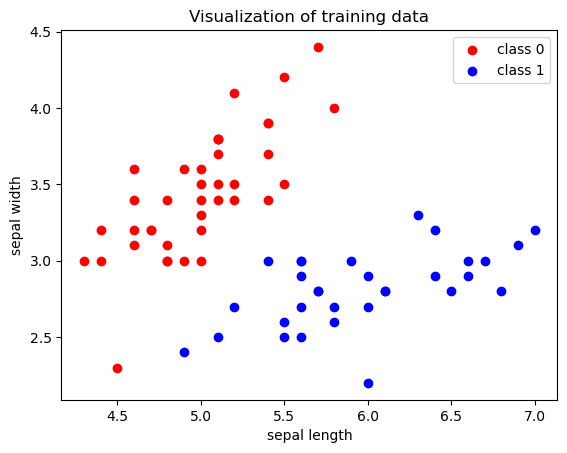

In [21]:
# Visualizing the training data 
# Extract data points for class 0 (y_train == 0)
X_class0 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int32)

# Extract data points for class 1 (y_train == 1)
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int32)

# Create a scatter plot
plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')

# Set labels and legend
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])

# Set the plot title
plt.title('Visualization of training data')
plt.show()

C:\Users\prasa\AppData\Local\Temp\ipykernel_67408\4159980019.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_class0[:, 0], X_class0[:, 1], c='red', edgecolors='k', cmap=plt.cm.Paired)
C:\Users\prasa\AppData\Local\Temp\ipykernel_67408\4159980019.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_class1[:, 0], X_class1[:, 1], c='blue', edgecolors='k', cmap=plt.cm.Paired)


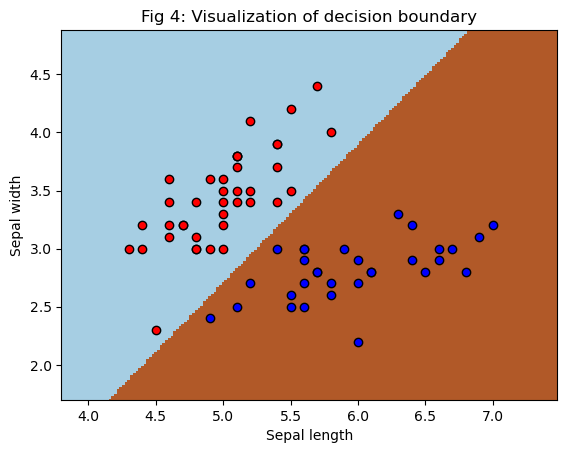

In [29]:
model = linear_model.LogisticRegression(C=1e5) 
#C is the inverse of the regularization factor. Larger values of C correspond to weaker regularization. 
# In this case, a very large value (1e5) is used, which means minimal regularization. 

full_X = np.concatenate((X_class0,X_class1),axis=0) 
full_Y = np.concatenate((Y_class0,Y_class1),axis=0) 
model.fit(full_X,full_Y)

#display the decision boundary 
h = 0.02 #step size of mesh 
x_min, x_max = full_X[:,0].min()-0.5, full_X[:,0].max()+0.5 #feat1 along x-axis 
y_min, y_max = full_X[:,1].min()-0.5, full_X[:,1].max()+0.5 #feat2 along y-axis 

xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) #xx & yy is two dimensional array
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space

#xx.ravel() and yy.ravel() are used to flatten these two-dimensional arrays into one-dimensional arrays.
#The .ravel() method essentially converts a multi-dimensional array into a one-dimensional 
#array by stacking its elements row by row.

#np.c_[xx.ravel(), yy.ravel()] concatenates the flattened xx and yy arrays column-wise,
#creating a new two-dimensional array where each row represents a point in the grid. 
#This combined array represents pairs of sepal length and sepal width values for each point in the grid.

# Put the result into a color plot
Z = Z.reshape(xx.shape) #resulting Z array contains the predicted class labels for all the points in the grid
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_class0[:, 0], X_class0[:, 1], c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()


Evaluate the model
------------------
We calculate the validation and test misclassification errors.

In [31]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 0.0 %
test misclassification percentage = 0.0 %


Zero misclassification error was possible only because the two classes were _linearly separable_ in the chosen feature space.

### Decision tree regression
Now we will solve the same problems using a decision tree. A decision tree is a _non-parametric_ machine learning model in contrast to linear/logistic regression which is a _parametric_ model. 
Non-parametric models do not make strong assumptions about the functional form or shape of the underlying data distribution.

First we solve the regression problem

### Prepare the data (as we did already) 

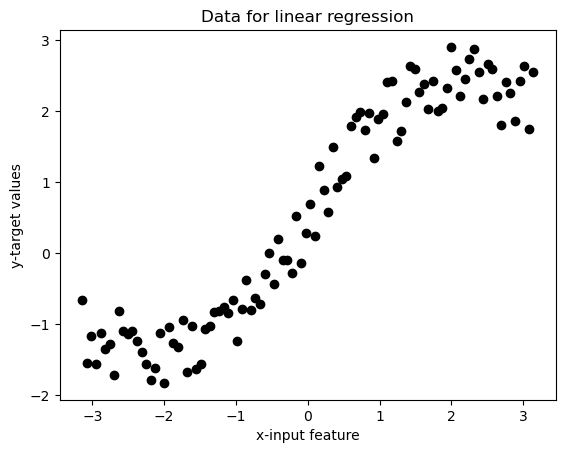

In [33]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Data for linear regression')
plt.show()

Split the data into training, validation and test sets
------------------------------------------------------


In [34]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

Fit a line to the data
----------------------
A decision tree learns a piece-wise linear fit to the data. We will use [sklearn.tree.DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

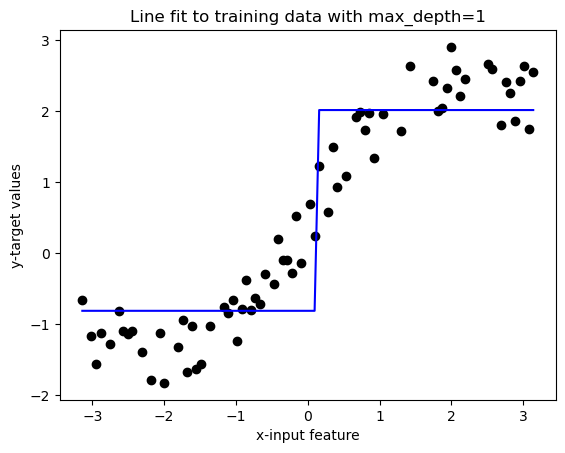

Training MSE:  0.34803679470248805 
Validation MSE:  0.21904395656877787 
Test MSE:  0.4563242201805822


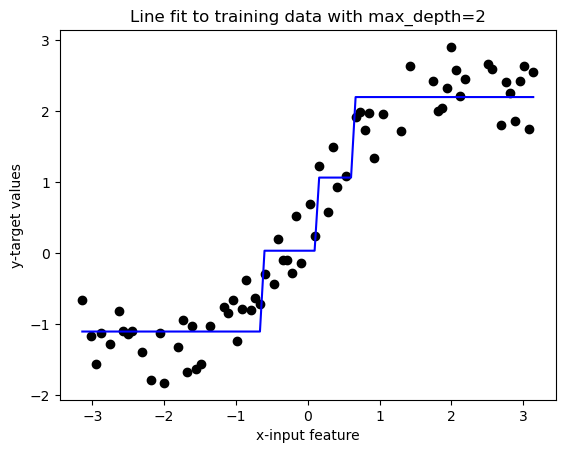

Training MSE:  0.13358674229522335 
Validation MSE:  0.12710733742365923 
Test MSE:  0.11380467041117158


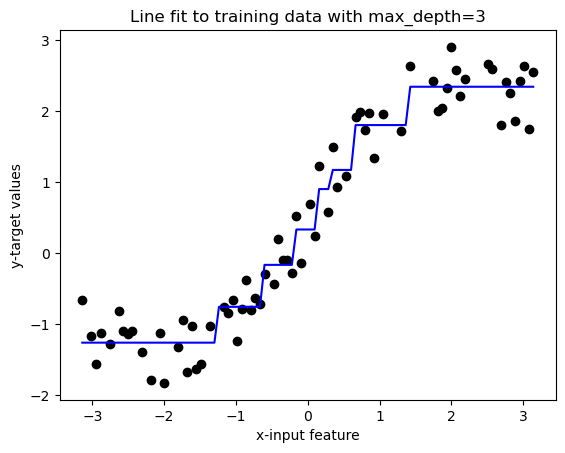

Training MSE:  0.07997066478701796 
Validation MSE:  0.11351731961548982 
Test MSE:  0.07544202190009354


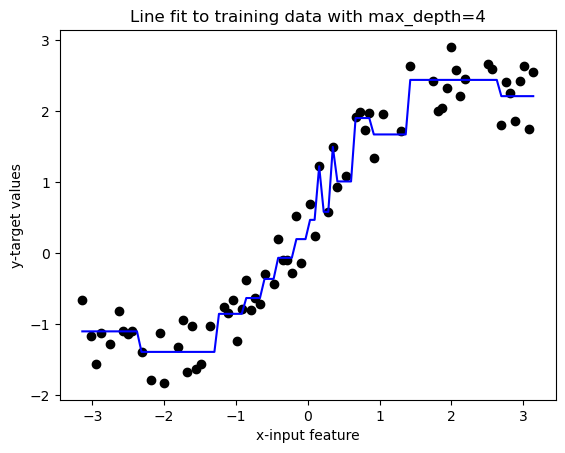

Training MSE:  0.05981027898712675 
Validation MSE:  0.1723508058926352 
Test MSE:  0.10487556096198143


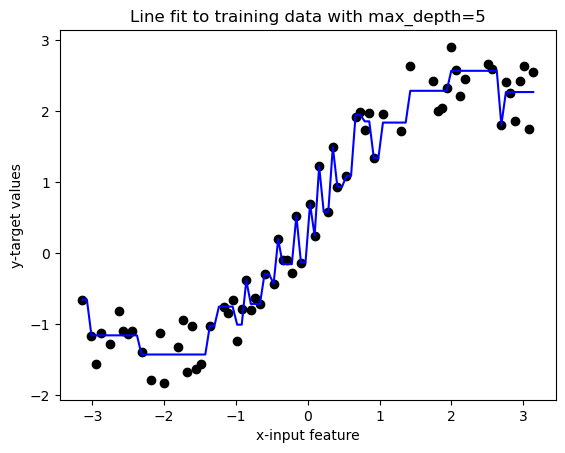

Training MSE:  0.03777175366693296 
Validation MSE:  0.14909429614675168 
Test MSE:  0.12568212814600785


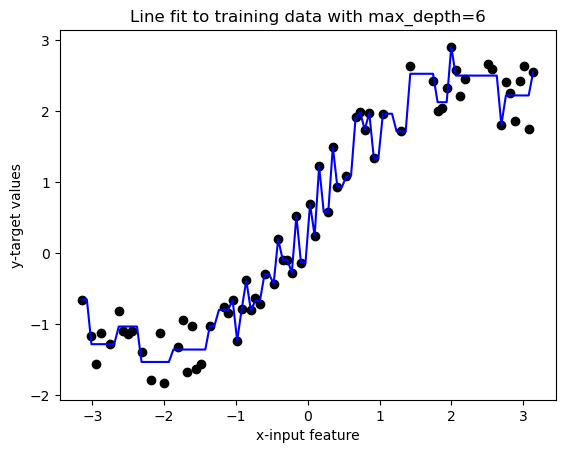

Training MSE:  0.025982724461023683 
Validation MSE:  0.1544409738948102 
Test MSE:  0.10613895574440849


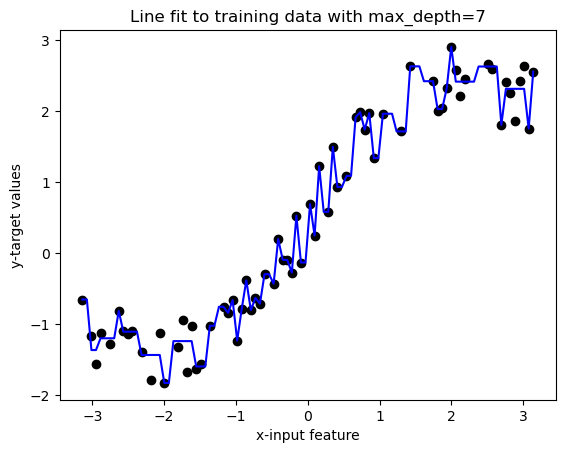

Training MSE:  0.014870055731839388 
Validation MSE:  0.2011893903012663 
Test MSE:  0.12179551555393626


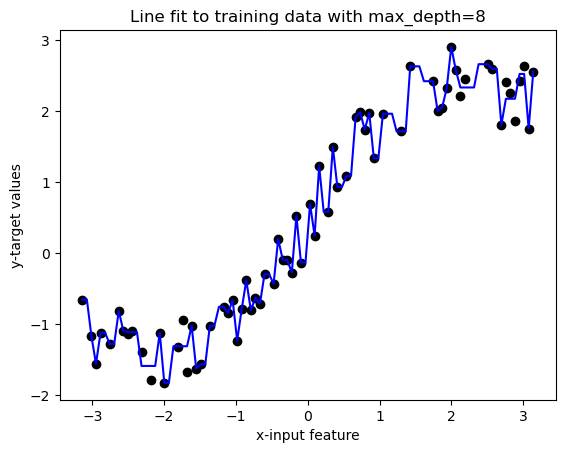

Training MSE:  0.007942381133723976 
Validation MSE:  0.20189667649114146 
Test MSE:  0.12313937698162057


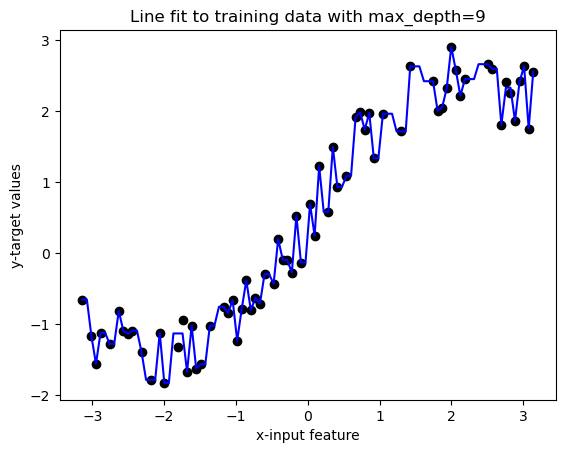

Training MSE:  0.001267473236363164 
Validation MSE:  0.19771363253134988 
Test MSE:  0.12112674003809529


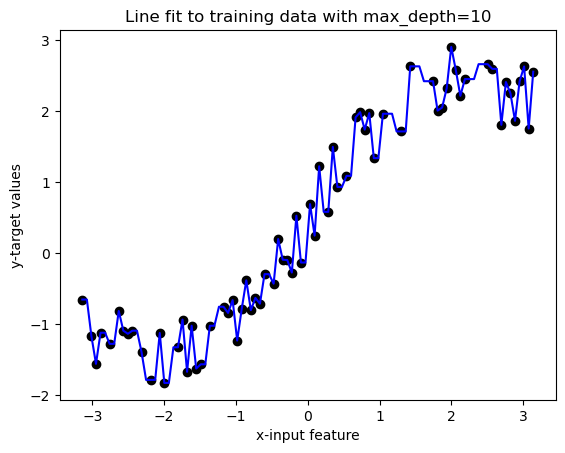

Training MSE:  0.0 
Validation MSE:  0.19678600221408288 
Test MSE:  0.12112674003809529


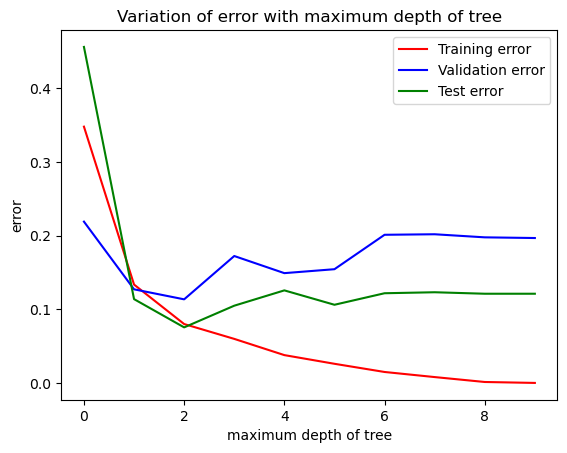

In [38]:
maximum_depth_of_tree = np.arange(10)+1 # create array of length 10 from 1,2..10 (0+1,1+1,..9+1)
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_final = np.asarray(x_train.reshape(len(x_train),1))
    y_train_final = np.asarray(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_final, y_train_final)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print ('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.xlabel("maximum depth of tree")
plt.ylabel("error")
plt.title('Variation of error with maximum depth of tree')
plt.show()

Notice how the generalization performance of the model can be controlled via the depth of a decision tree. The training error decreases steadily with increasing depth as the model fits the data more and more closely. The generalization errors given by the validation and test errors also decrease till a depth of 3 as the bias in the model reduces. However, as we increase the depth beyond 3, the model starts overfitting the data (huggs onto noise in the data) and validation and test errors increase. Thus the ability of the model to generalize deteriorates as overfitting sets in.

### Decision tree classification 
A decision tree can be used to learn a piece-wise linear decision boundary between classes. We demonstrate the working of a decision tree on the entire of Iris dataset. We use [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

The example was taken from: http://scikit-learn.org/stable/modules/tree.html#classification.

The decision boundaries learnt by the different decision nodes can be visualized as described here: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#plot-the-decision-surface-of-a-decision-tree-on-the-iris-dataset.

### Prepare the dataset

In [39]:
iris = datasets.load_iris() 
X = iris.data[:,:2] # take first 2 input feature 
Y = iris.target 
#taking first 100 samples, first 50 class 0 and next 50 belongs to class 1 
X = X[:100] 
Y = Y[:100] 
num_samples = len(X) 

#splitting the data into train,val,test 
random_indices = np.random.permutation(num_samples) 
x_train = X[random_indices[:70]]
y_train = Y[random_indices[:70]]

x_val = X[random_indices[70:85]]
y_val = Y[random_indices[70:85]]

x_test = X[random_indices[85:]]
y_test = Y[random_indices[85:]] 


### Fit the model

In [43]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train) 
print(vars(model))

{'criterion': 'gini', 'splitter': 'best', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'max_features': None, 'max_leaf_nodes': None, 'random_state': None, 'min_impurity_decrease': 0.0, 'class_weight': None, 'ccp_alpha': 0.0, 'n_features_in_': 2, 'n_outputs_': 1, 'classes_': array([0, 1]), 'n_classes_': 2, 'max_features_': 2, 'tree_': <sklearn.tree._tree.Tree object at 0x0000026D3175FDC0>}


### Visualise the tree 

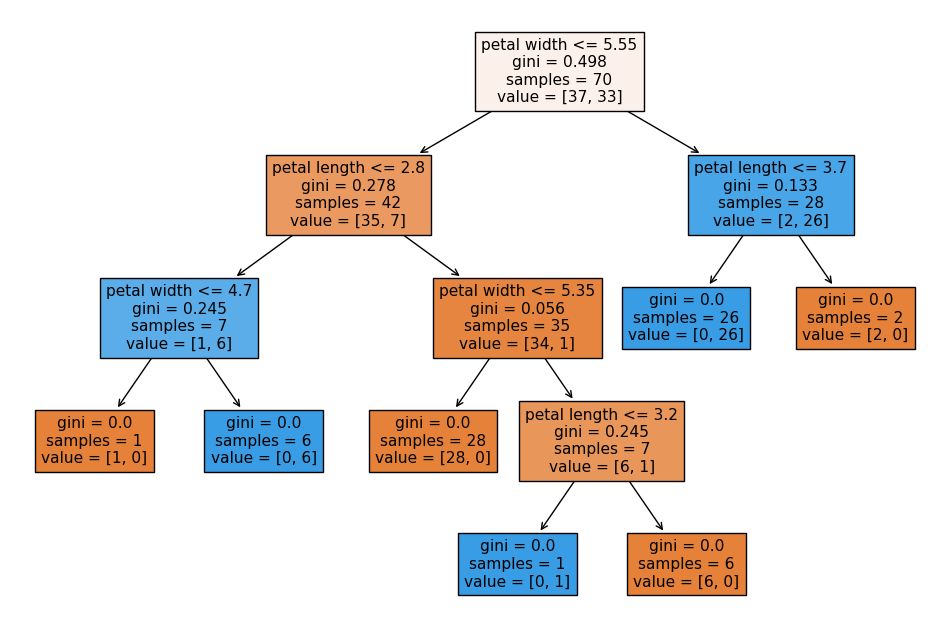

In [47]:
from sklearn.tree import plot_tree
# Define the feature names 
feature_names = ['petal width', 'petal length']

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

The gini coefficient is a measure of homogenity in a cluster. Gini coefficient of 0.0 indicates that a cluster is completely homogeneous (i.e. only one class is present in the cluster).

### Evaluate the model 

In [48]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,len(x_val[i]))))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 0.0 %
test misclassification percentage = 0.0 %
